<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/Machine_Learning_code%20part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



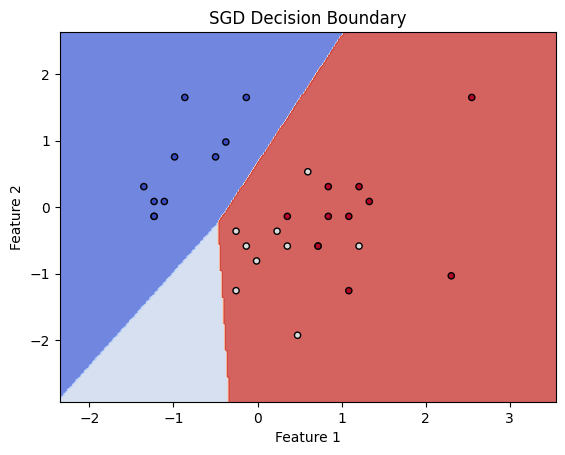

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

X_vis = X[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

model_vis = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
model_vis.fit(X_train_vis, y_train_vis)

plot_decision_boundary(X_test_vis, y_test_vis, model_vis, title='SGD Decision Boundary')



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


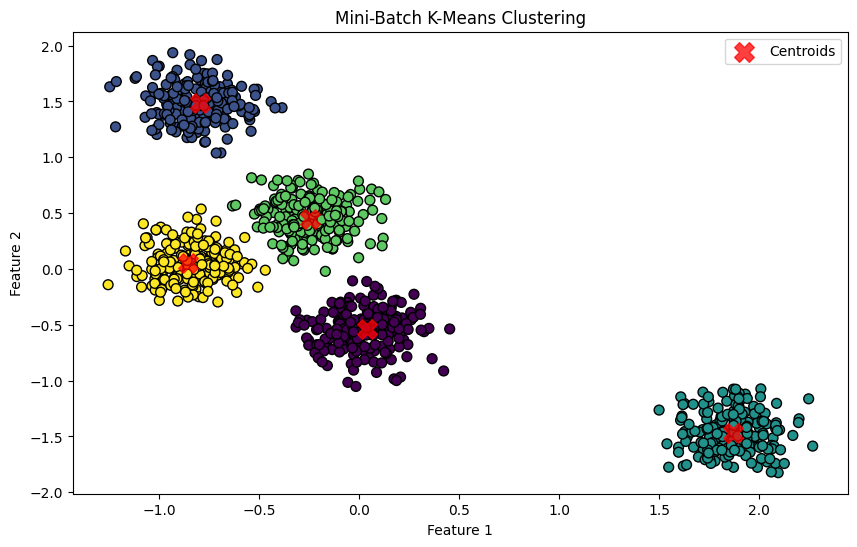

Cluster centers:
[[ 0.03805736 -0.53558722]
 [-0.79601624  1.48344165]
 [ 1.86932476 -1.4669664 ]
 [-0.24863722  0.44831157]
 [-0.85600916  0.05619578]]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 5
model = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)

model.fit(X_scaled)

y_kmeans = model.predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('Mini-Batch K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print("Cluster centers:")
print(centers)


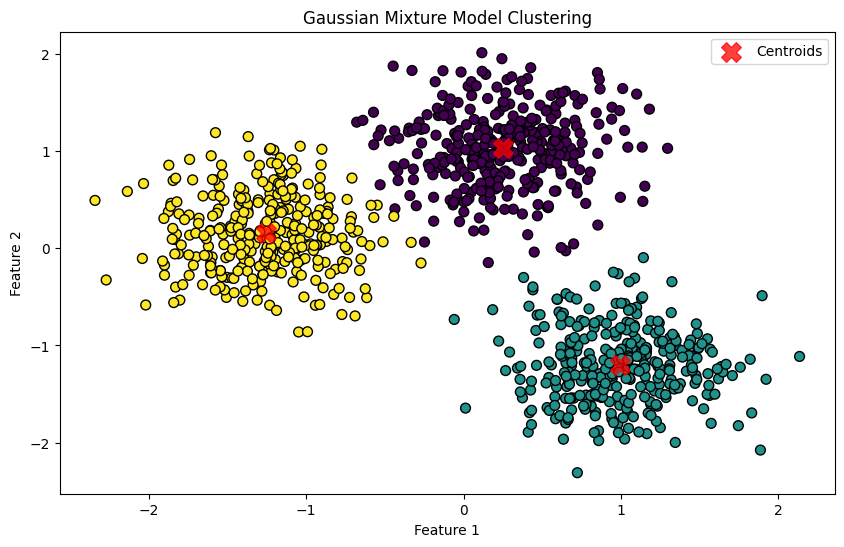

Cluster means:
[[ 0.25237832  1.03622143]
 [ 0.9915594  -1.19731709]
 [-1.25717228  0.15722842]]

Covariances:
[[[ 0.13558833  0.00618953]
  [ 0.00618953  0.15566164]]

 [[ 0.12404782 -0.00516916]
  [-0.00516916  0.14808648]]

 [[ 0.12382418 -0.00278459]
  [-0.00278459  0.15524322]]]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=3, random_state=42)

gmm.fit(X_scaled)

y_gmm = gmm.predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_gmm, s=50, cmap='viridis', edgecolor='k')
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print("Cluster means:")
print(gmm.means_)
print("\nCovariances:")
print(gmm.covariances_)


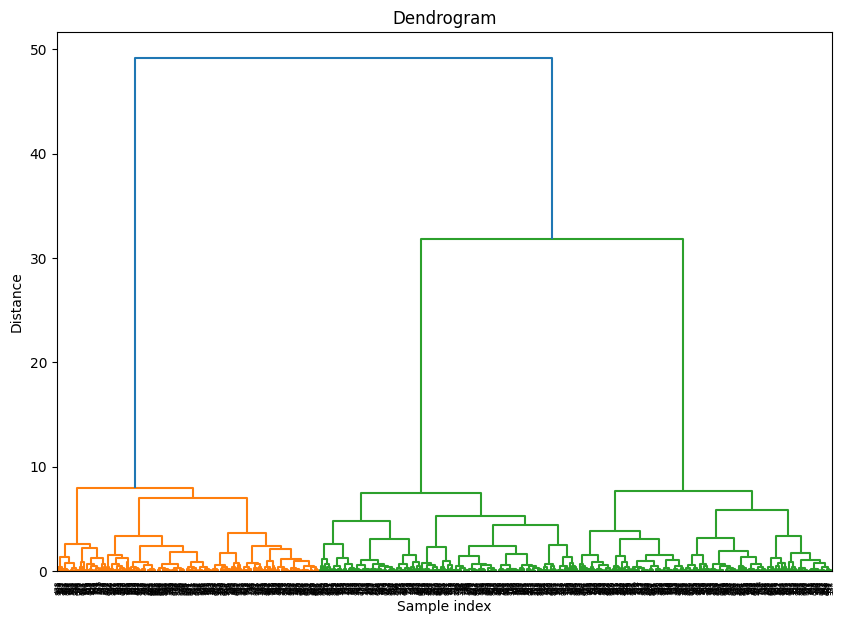

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


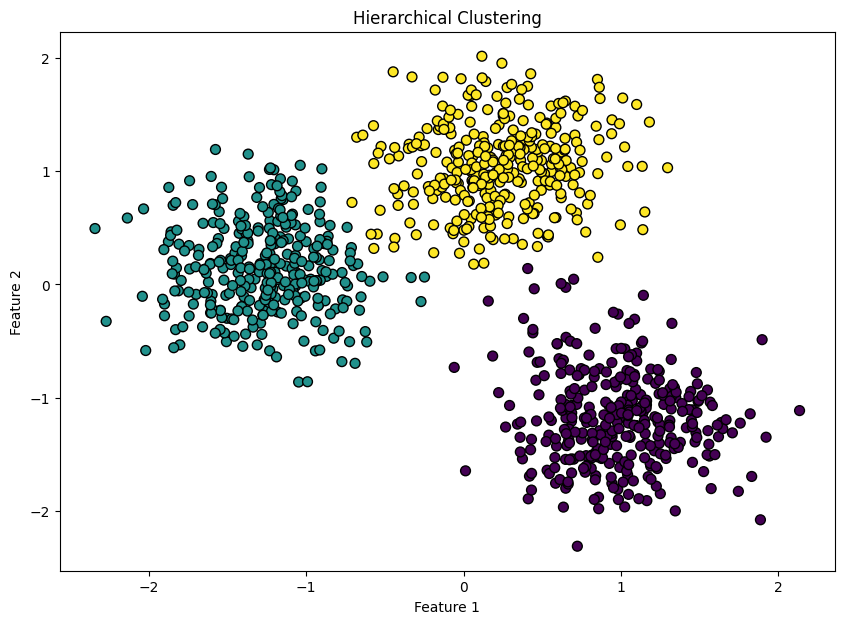

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

y_hc = model.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_hc, s=50, cmap='viridis', edgecolor='k')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Silhouette Score: 0.4746899885102371


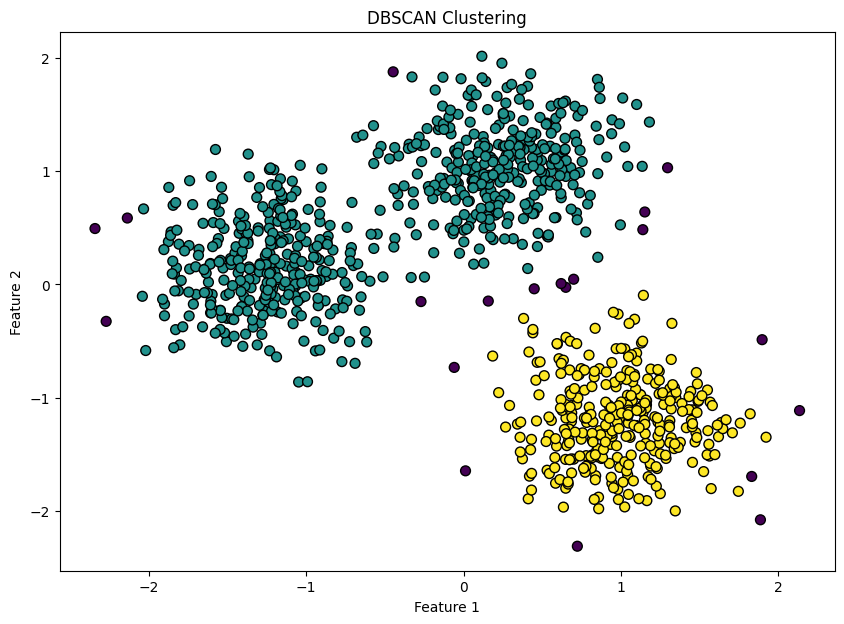

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = DBSCAN(eps=0.3, min_samples=10)

y_db = model.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, y_db)
print(f'Silhouette Score: {silhouette_avg}')

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_db, s=50, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
